I look at the formal uncertainty of the coordinates for radio sources.

In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Load the statistical information.

In [2]:
# 4-step
ts_stats4 = Table.read("../logs/ts_stat_nju_20210531.log", format="ascii")

# 8-step
ts_stats8 = Table.read("../logs/ts_stat_nju_20210608.log", format="ascii")

# 10-step
ts_stats10 = Table.read("../logs/ts_stat_nju_20210605.log", format="ascii")

# 20-step
ts_stats20 = Table.read("../logs/ts_stat_nju_20210609.log", format="ascii")

In [3]:
bin_array = np.arange(0, 100, 5) * 0.01

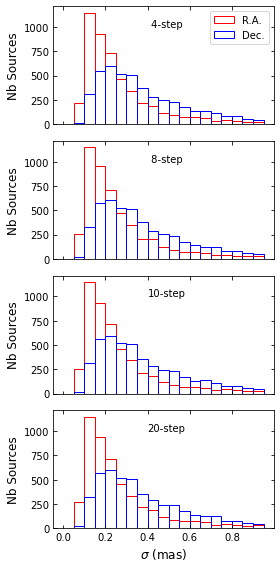

In [4]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(4, 8),
                                         nrows=4,
                                         sharex=True,
                                         sharey=True)

ax0.hist(ts_stats4["med_err_ra"],
         bins=bin_array,
         edgecolor="r",
         fill=False,
         label="R.A.")
ax0.hist(ts_stats4["med_err_dec"],
         bins=bin_array,
         edgecolor="b",
         fill=False,
         label="Dec.")

ax1.hist(ts_stats8["med_err_ra"],
         bins=bin_array,
         edgecolor="r",
         fill=False,
         label="R.A.")
ax1.hist(ts_stats8["med_err_dec"],
         bins=bin_array,
         edgecolor="b",
         fill=False,
         label="Dec.")

ax2.hist(ts_stats10["med_err_ra"],
         bins=bin_array,
         edgecolor="r",
         fill=False,
         label="R.A.")
ax2.hist(ts_stats10["med_err_dec"],
         bins=bin_array,
         edgecolor="b",
         fill=False,
         label="Dec.")

ax3.hist(ts_stats20["med_err_ra"],
         bins=bin_array,
         edgecolor="r",
         fill=False,
         label="R.A.")
ax3.hist(ts_stats20["med_err_dec"],
         bins=bin_array,
         edgecolor="b",
         fill=False,
         label="Dec.")

ax3.set_xlabel("$\\sigma$ (mas)", fontsize=12)
ax0.set_ylabel("Nb Sources", fontsize=12)
ax1.set_ylabel("Nb Sources", fontsize=12)
ax2.set_ylabel("Nb Sources", fontsize=12)
ax3.set_ylabel("Nb Sources", fontsize=12)

loc_x, loc_y = 0.4, 1000
ax0.text(loc_x, loc_y, " 4-step")
ax1.text(loc_x, loc_y, " 8-step")
ax2.text(loc_x, loc_y, "10-step")
ax3.text(loc_x, loc_y, "20-step")

ax0.legend(loc="upper right")

plt.tight_layout()

Also format the output in a table.

In [5]:
icrf3_def = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

In [6]:
def simple_sigma_stats(ts_stats, icrf3_def):

    ts_stats_def = join(icrf3_def, ts_stats, keys="iers_name")

    # For all sources
    median_sigmara_all = np.median(ts_stats["med_err_ra"])
    median_sigmadec_all = np.median(ts_stats["med_err_dec"])

    # For defining sources only
    median_sigmara_def = np.median(ts_stats_def["med_err_ra"])
    median_sigmadec_def = np.median(ts_stats_def["med_err_dec"])

    # Format the output
    line_format = "{:8.3f}  {:8.3f}    "

    line_all = line_format.format(
        median_sigmara_all, median_sigmadec_all)
    line_def = line_format.format(
        median_sigmara_def, median_sigmadec_def)

    line = line_all + line_def

    return line


In [7]:
line4 = simple_sigma_stats(ts_stats4, icrf3_def)
line8 = simple_sigma_stats(ts_stats8, icrf3_def)
line10 = simple_sigma_stats(ts_stats10, icrf3_def)
line20 = simple_sigma_stats(ts_stats20, icrf3_def)

In [8]:
print("=======================================================")
print("                      All               ICRF3 defining")
print("               -----------------     ------------------")
print("Solution       RA        DEC         RA        DEC    ")
print("R.A.")
print(" 4-step sol {:s}".format(line4))
print(" 8-step sol {:s}".format(line8))
print("10-step sol {:s}".format(line10))
print("20-step sol {:s}".format(line20))
print("-------------------------------------------------------")
print("Unit: mas")
print("The values given are median.")

                      All               ICRF3 defining
               -----------------     ------------------
Solution       RA        DEC         RA        DEC    
R.A.
 4-step sol    0.217     0.361       0.251     0.311    
 8-step sol    0.217     0.359       0.246     0.316    
10-step sol    0.215     0.358       0.247     0.309    
20-step sol    0.214     0.356       0.246     0.307    
-------------------------------------------------------
Unit: mas
The values given are median.
